In [1]:
import dolphindb as ddb
import matplotlib.pyplot as plt
import pandas as pd


def draw():
    pass

def backtest(factor):
    def core(num):
        sess = ddb.session(host='localhost', port=8848, userid='admin', password='123456')
        sess.run("factor = table(1000:0,`trade_time`instrument`factor_value, [TIMESTAMP,SYMBOL,DOUBLE])")
        sess.run("tableInsert{factor}",factor)
        sess.run(f"num = {num}")
        df: pd.DataFrame = sess.runFile("backtest.dos")
        sess.close()
        return df
    
    df_2 = core(2)
    # plt.figure()
    df_2.set_index("trade_time").groupby('grp')['af_rev'].plot(legend=True)
    # df_2.plot(kind='line')
    # plt.title('grp2')

    df_5 = core(5)
    # df_5.set_index("trade_time").groupby('grp')['af_rev'].plot(legend=True)
    # plt.figure()
    # df_5 = df_5.set_index("trade_time").drop(columns='ct')
    # df_5.plot(kind='line')
    # plt.title('grp5')

    # # 显示图表
    # plt.show()
    return df_2, df_5

In [16]:
factor2 = """
use wq101alpha
instruments = select instrument from (select min(trade_time) as min, instrument from loadTable("dfs://crypto_db", "k_hour") group by instrument) where min < 2021.01.01
instruments_ohlc = select trade_time, instrument, open from loadTable("dfs://crypto_db", "k_hour") where trade_time >= 2021.01.01 and trade_time <= 2023.11.15 and instrument in instruments
close = exec open as close from instruments_ohlc where date(trade_time) between 2021.01.01 : 2023.11.15 pivot by trade_time, instrument
alpha1 = WQAlpha1(close)
factor = table(alpha1.rowNames() as trade_time, alpha1)
factor = factor.unpivot(`trade_time, factor.columnNames()[1:])
factor.rename!(`trade_time`instrument`factor_value)
factor = select timestamp(trade_time) as trade_time, instrument, factor_value from factor where factor_value is not null
factor
"""

In [17]:
factor3 = """
use wq101alpha
instruments = select instrument from (select min(trade_time) as min, instrument from loadTable("dfs://crypto_db", "k_hour") group by instrument) where min < 2021.01.01
instruments_ohlc = select trade_time, instrument, open, close, volume from loadTable("dfs://crypto_db", "k_hour") where trade_time >= 2021.01.01 and trade_time <= 2023.11.15 and instrument in instruments
t = select instrument, trade_time, volume, close, open from instruments_ohlc where date(trade_time) between 2021.01.01 : 2023.11.15
data = dict(`vol`close`open, panel(t.trade_time, t.instrument, [t.volume, t.close, t.open]))
alpha2 = WQAlpha2(data['vol'], data['close'], data['open'])
alpha2 = move(alpha2, 1)
factor = table(alpha2.rowNames() as trade_time, alpha2)
factor = factor.unpivot(`trade_time, factor.columnNames()[1:])
factor.rename!(`trade_time`instrument`factor_value)
factor = select timestamp(trade_time) as trade_time, instrument, factor_value from factor where factor_value is not null
factor
"""

In [18]:
factor4 = """
use wq101alpha
instruments = select instrument from (select min(trade_time) as min, instrument from loadTable("dfs://crypto_db", "k_hour") group by instrument) where min < 2021.01.01
instruments_ohlc = select trade_time, instrument, open, volume from loadTable("dfs://crypto_db", "k_hour") where trade_time >= 2021.01.01 and trade_time <= 2023.11.15 and instrument in instruments
t = select instrument, trade_time, volume, open from instruments_ohlc where date(trade_time) between 2021.01.01 : 2023.11.15
data = dict(`vol`open, panel(t.trade_time, t.instrument, [t.volume, t.open]))
alpha = WQAlpha3(data['vol'], data['open'])
factor = table(alpha.rowNames() as trade_time, alpha)
factor = factor.unpivot(`trade_time, factor.columnNames()[1:])
factor.rename!(`trade_time`instrument`factor_value)
factor = select timestamp(trade_time) as trade_time, instrument, factor_value from factor where factor_value is not null
factor
"""

In [19]:
factor5 = """
use wq101alpha
instruments = select instrument from (select min(trade_time) as min, instrument from loadTable("dfs://crypto_db", "k_hour") group by instrument) where min < 2021.01.01

instruments_ohlc = select trade_time, instrument, low from loadTable("dfs://crypto_db", "k_hour") where trade_time >= 2021.01.01 and trade_time <= 2023.11.15 and instrument in instruments
low = exec low from instruments_ohlc where date(trade_time) between 2021.01.01 : 2023.11.15 pivot by trade_time, instrument
alpha = WQAlpha4(low)
alpha = move(alpha, 1)
factor = table(alpha.rowNames() as trade_time, alpha)
factor = factor.unpivot(`trade_time, factor.columnNames()[1:])
factor.rename!(`trade_time`instrument`factor_value)
factor = select timestamp(trade_time) as trade_time, instrument, factor_value from factor where factor_value is not null
factor
"""

In [20]:
factor6 = """
use wq101alpha
instruments = select instrument from (select min(trade_time) as min, instrument from loadTable("dfs://crypto_db", "k_hour") group by instrument) where min < 2021.01.01

instruments_ohlc = select trade_time, instrument, open, volume from loadTable("dfs://crypto_db", "k_hour") where trade_time >= 2021.01.01 and trade_time <= 2023.11.15 and instrument in instruments
t = select instrument, trade_time, volume, open from instruments_ohlc where date(trade_time) between 2021.01.01 : 2023.11.15
data = dict(`vol`open, panel(t.trade_time, t.instrument, [t.volume, t.open]))
alpha = WQAlpha6(data.vol, data.open)
alpha = move(alpha, 1)
factor = table(alpha.rowNames() as trade_time, alpha)
factor = factor.unpivot(`trade_time, factor.columnNames()[1:])
factor.rename!(`trade_time`instrument`factor_value)
factor = select timestamp(trade_time) as trade_time, instrument, factor_value from factor where factor_value is not null
factor
"""

                trade_time instrument  factor_value
0      2021-01-01 08:00:00  1INCHUSDT      0.093741
1      2021-01-01 16:00:00  1INCHUSDT      0.054785
2      2021-01-02 00:00:00  1INCHUSDT      0.011694
3      2021-01-02 08:00:00  1INCHUSDT      0.050527
4      2021-01-02 16:00:00  1INCHUSDT     -0.012735
...                    ...        ...           ...
245227 2023-11-13 16:00:00    ZRXUSDT      0.066690
245228 2023-11-14 00:00:00    ZRXUSDT      0.048619
245229 2023-11-14 08:00:00    ZRXUSDT      0.038521
245230 2023-11-14 16:00:00    ZRXUSDT     -0.067244
245231 2023-11-15 00:00:00    ZRXUSDT      0.007923

[245232 rows x 3 columns]


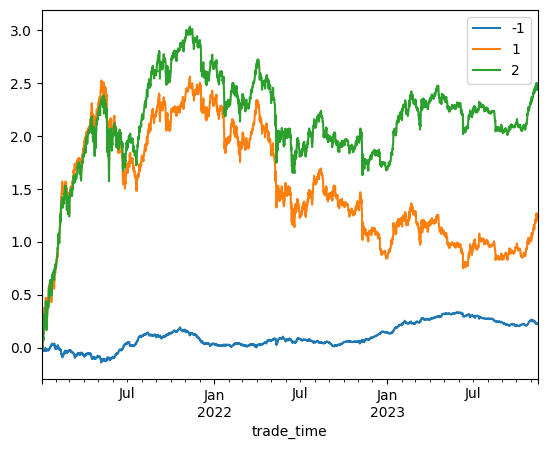

In [2]:
sess = ddb.session(host='localhost', port=8848, userid='admin', password='123456')
df = sess.runFile('factors/factor1.dos')
# df['factor_value'] = -df['factor_value']
print(df)
sess.close()
result_2, result_5 = backtest(df)

In [11]:
result_2

,trade_time,grp,cumret,cnt,cumfee,af_rev
0,2021-01-01 16:00:00,1,0.013894,39,0.000105,0.013789
1,2021-01-02 00:00:00,1,0.002879,39,0.000246,0.002633
2,2021-01-02 08:00:00,1,0.000964,39,0.000357,0.000607
3,2021-01-02 16:00:00,1,0.013526,39,0.000505,0.013021
4,2021-01-03 00:00:00,1,0.002529,39,0.000609,0.001919
...,...,...,...,...,...,...
9424,2023-11-13 16:00:00,-1,-1.260413,0,0.786134,-2.046547
9425,2023-11-14 00:00:00,-1,-1.253718,0,0.786331,-2.040049
9426,2023-11-14 08:00:00,-1,-1.254327,0,0.786614,-2.040941
9427,2023-11-14 16:00:00,-1,-1.249330,0,0.786835,-2.036166
